In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
   ---------------------------------------- 0.0/241.4 MB ? eta -:--:--
    --------------------------------------- 5.2/241.4 MB 35.3 MB/s eta 0:00:07
   - -------------------------------------- 10.7/241.4 MB 30.5 MB/s eta 0:00:08
   -- ------------------------------------- 16.3/241.4 MB 29.2 MB/s eta 0:00:08
   --- ------------------------------------ 21.5/241.4 MB 28.3 MB/s eta 0:00:08
   ---- ----------------------------------- 27.3/241.4 MB 28.3 MB/s eta 0:00:08
   ----- ---------------------------------- 33.0/241.4 MB 28.3 MB/s eta 0:00:08
   ------ --------------------------------- 37.5/241.4 MB 27.4 MB/s eta 0:00:08
   ------ --------------------------------- 41.7/241.4 MB 26.5 MB/s eta 0:00:08
   ------- -------------------------------- 45.9/241.4 MB 25.8 MB/s eta 0:00:08
   -------- ------------------------------- 50

  You can safely remove it manually.
  You can safely remove it manually.


In [8]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !move pytorch-deep-learning\going_modular .
    !rmdir /s /q pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.


Cloning into 'pytorch-deep-learning'...
Updating files:  46% (115/248)
Updating files:  47% (117/248)
Updating files:  48% (120/248)
Updating files:  49% (122/248)
Updating files:  50% (124/248)
Updating files:  51% (127/248)
Updating files:  52% (129/248)
Updating files:  53% (132/248)
Updating files:  54% (134/248)
Updating files:  55% (137/248)
Updating files:  56% (139/248)
Updating files:  57% (142/248)
Updating files:  58% (144/248)
Updating files:  59% (147/248)
Updating files:  60% (149/248)
Updating files:  61% (152/248)
Updating files:  62% (154/248)
Updating files:  63% (157/248)
Updating files:  64% (159/248)
Updating files:  65% (162/248)
Updating files:  66% (164/248)
Updating files:  67% (167/248)
Updating files:  68% (169/248)
Updating files:  69% (172/248)
Updating files:  70% (174/248)
Updating files:  71% (177/248)
Updating files:  72% (179/248)
Updating files:  73% (182/248)
Updating files:  74% (184/248)
Updating files:  75% (186/248)
Updating files:  76% (189/248)

        1 dir(s) moved.


d:\pytorch exercise\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

data\pizza_steak_sushi directory exists.


In [11]:
train_dir  =  image_path  /  "train" 
test_dir  =  image_path  /  "test"

In [12]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225]) 
])

In [13]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1d77c6ebd90>,
 ['pizza', 'steak', 'sushi'])

In [14]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [15]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [16]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1d77c732d50>,
 ['pizza', 'steak', 'sushi'])

In [17]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT 
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\Dariusz Marecik/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 48.8MB/s]


In [18]:
summary(model=model, 
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [19]:
for param in model.features.parameters():
    param.requires_grad = False

In [20]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, 
                    bias=True)).to(device)

In [21]:
summary(model, 
        input_size=(32, 3, 224, 224), 
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer 
start_time = timer()

results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:47<03:10, 47.59s/it]

Epoch: 1 | train_loss: 1.1006 | train_acc: 0.3945 | test_loss: 0.9054 | test_acc: 0.6212


 40%|████      | 2/5 [01:08<01:34, 31.64s/it]

Epoch: 2 | train_loss: 0.8679 | train_acc: 0.7734 | test_loss: 0.7890 | test_acc: 0.8456


 60%|██████    | 3/5 [01:28<00:52, 26.46s/it]

Epoch: 3 | train_loss: 0.7698 | train_acc: 0.7969 | test_loss: 0.7436 | test_acc: 0.8456


 80%|████████  | 4/5 [01:47<00:23, 23.43s/it]

Epoch: 4 | train_loss: 0.7230 | train_acc: 0.7461 | test_loss: 0.6349 | test_acc: 0.8655


100%|██████████| 5/5 [02:05<00:00, 25.12s/it]

Epoch: 5 | train_loss: 0.6315 | train_acc: 0.7734 | test_loss: 0.6256 | test_acc: 0.8864
[INFO] Total training time: 125.585 seconds


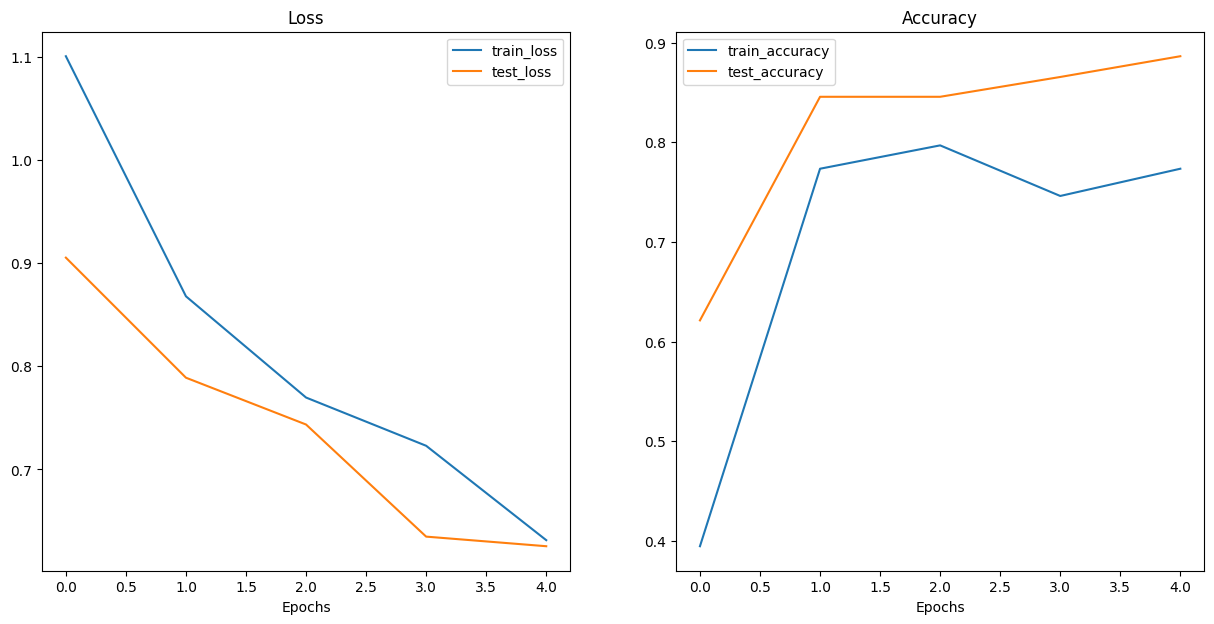

In [24]:
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

plot_loss_curves(results)

In [25]:
from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    img = Image.open(image_path)

    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])
    
    model.eval()
    with torch.inference_mode():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))
    
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

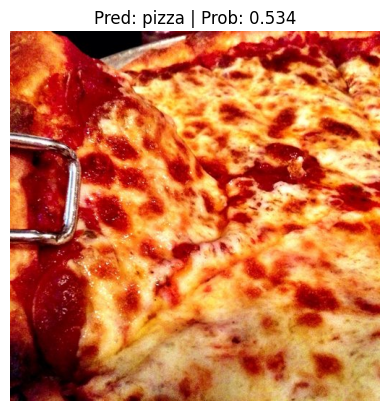

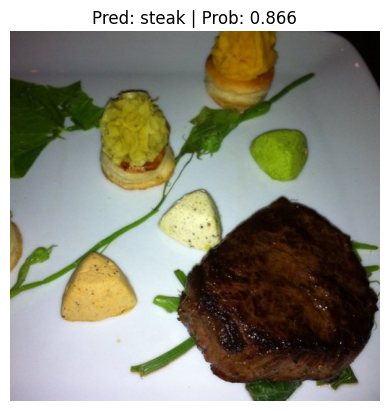

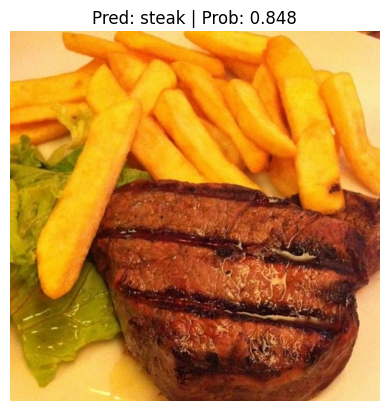

In [26]:
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) 
test_image_path_sample = random.sample(population=test_image_path_list, 
                                       k=num_images_to_plot)
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))

data\04-pizza-dad.jpeg already exists, skipping download.


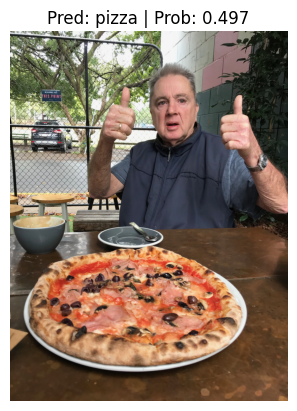

In [27]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)

<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/06_pytorch_transfer_learning_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. PyTorch Transfer Learning Exercises

Welcome to the 06. PyTorch Transfer Learning exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.

## Resources and solutions

* These exercises/solutions are based on [section 06. PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.

**Solutions:** 

Try to complete the code below *before* looking at these.

* See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/ueLolShyFqs).
* See an example [solutions notebook for these exercises on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/06_pytorch_transfer_learning_exercise_solutions.ipynb).

## 1. Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. 
* **Note:** You will need to get the dataset and the trained model/retrain the model from notebook 06 to perform predictions.
* Check out [03. PyTorch Computer Vision section 10](https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation) for ideas.

In [29]:
# Import required libraries/code
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torchvision import transforms, datasets

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [30]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data 

In [31]:
import os
import requests
import zipfile

from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

data\pizza_steak_sushi directory exists.


### Prepare data

In [32]:
# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [33]:
# Create training and testing DataLoader's as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1d7871966d0>,
 ['pizza', 'steak', 'sushi'])

### Get and prepare a pretrained model

In [34]:
# Setup the model with pretrained weights and send it to the target device 
model_0 = torchvision.models.efficientnet_b0(pretrained=True).to(device)
#model_0 # uncomment to output (it's very long)

d:\pytorch exercise\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\pytorch exercise\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_0.features.parameters():
    param.requires_grad = False

In [36]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

### Train model

In [37]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [38]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
model_0_results = engine.train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:27<01:48, 27.19s/it]

Epoch: 1 | train_loss: 1.1032 | train_acc: 0.4180 | test_loss: 0.9160 | test_acc: 0.5085


 40%|████      | 2/5 [00:47<01:08, 22.99s/it]

Epoch: 2 | train_loss: 0.8681 | train_acc: 0.7734 | test_loss: 0.8011 | test_acc: 0.7434


 60%|██████    | 3/5 [01:06<00:43, 21.51s/it]

Epoch: 3 | train_loss: 0.7758 | train_acc: 0.7852 | test_loss: 0.7401 | test_acc: 0.7633


 80%|████████  | 4/5 [01:26<00:20, 20.80s/it]

Epoch: 4 | train_loss: 0.7358 | train_acc: 0.7422 | test_loss: 0.6486 | test_acc: 0.8864


100%|██████████| 5/5 [01:49<00:00, 21.98s/it]

Epoch: 5 | train_loss: 0.6491 | train_acc: 0.7656 | test_loss: 0.6277 | test_acc: 0.8864
[INFO] Total training time: 109.914 seconds


### Make predictions on the entire test dataset with the model

In [40]:
# TODO
from tqdm.auto import tqdm
test_preds = []
model_0.eval()
with torch.inference_mode():
    for batch, (X,y) in enumerate(test_dataloader):
        X, y = X.to(device), y.to(device)
        y_logit = model_0(X)

        pred_probs = torch.softmax(y_logit, dim=1)
        pred_labels = torch.argmax(pred_probs, dim=1)

        test_preds.append(pred_labels)

test_preds = torch.cat(test_preds).cpu()
test_preds


tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 2])

### Make a confusion matrix with the test preds and the truth labels

Need the following libraries to make a confusion matrix:
* torchmetrics - https://torchmetrics.readthedocs.io/en/stable/
* mlxtend - http://rasbt.github.io/mlxtend/

In [41]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [42]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


In [43]:
test_truth = torch.cat([y for X, y in test_dataloader])

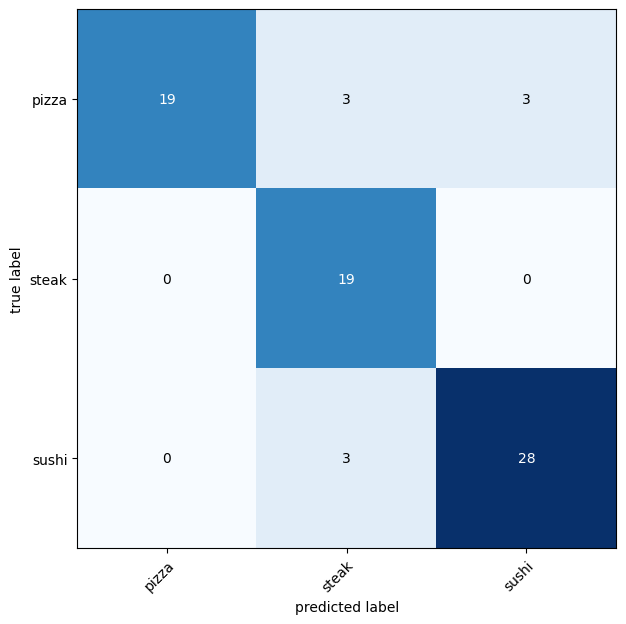

In [45]:
# TODO
from mlxtend.plotting import plot_confusion_matrix
confmat = torchmetrics.ConfusionMatrix(task = "multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=test_preds,
                         target=test_truth)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
)

## 2. Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
* Predicting across all of the test dataset, storing the labels and predicted probabilities.
* Sort the predictions by *wrong prediction* and then *descending predicted probabilities*, this will give you the wrong predictions with the *highest* prediction probabilities, in other words, the "most wrong".
* Plot the top 5 "most wrong" images, why do you think the model got these wrong?

You'll want to:
* Create a DataFrame with sample, label, prediction, pred prob
* Sort DataFrame by correct (does label == prediction)
* Sort DataFrame by pred prob (descending)
* Plot the top 5 "most wrong" image predictions

In [47]:
# TODO
from tqdm.auto import tqdm

def pred_and_store(test_paths, model, transform, class_names, device):
    test_pred_list = []
    for path in tqdm(test_paths):
        pred_dict = {}
        pred_dict["image_path"] = path

        class_name = path.parent.stem
        pred_dict["class_name"] = class_name

        img = Image.open(path)
        transformed_image = transform(img).unsqueeze(0)
        model.eval()

        with torch.inference_mode():
            y_logit = model(transformed_image.to(device))

            pred_prob = torch.softmax(y_logit, dim=1)
            pred_label = torch.argmax(pred_prob, dim=1)
            pred_class = class_names[pred_label.cpu()]


            pred_dict["pred_prob"] = pred_prob.unsqueeze(0).max().cpu().item()
            pred_dict["pred_class"] = pred_class
        pred_dict["correct"] = class_name == pred_class
        test_pred_list.append(pred_dict)
    return test_pred_list
            

test_pred_list = pred_and_store(list(Path(test_dir).glob("*/*.jpg")), model, simple_transform, class_names, device)

test_pred_list[:5]

100%|██████████| 75/75 [00:01<00:00, 44.59it/s]


[{'image_path': WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
  'class_name': 'pizza',
  'pred_prob': 0.6254012584686279,
  'pred_class': 'pizza',
  'correct': True},
 {'image_path': WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
  'class_name': 'pizza',
  'pred_prob': 0.6530741453170776,
  'pred_class': 'pizza',
  'correct': True},
 {'image_path': WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
  'class_name': 'pizza',
  'pred_prob': 0.5302637219429016,
  'pred_class': 'pizza',
  'correct': True},
 {'image_path': WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
  'class_name': 'pizza',
  'pred_prob': 0.7476152181625366,
  'pred_class': 'pizza',
  'correct': True},
 {'image_path': WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
  'class_name': 'pizza',
  'pred_prob': 0.4024221897125244,
  'pred_class': 'pizza',
  'correct': True}]

In [51]:
import pandas as pd
test_pred_pd = pd.DataFrame(test_pred_list)
test_pred_pd = test_pred_pd.sort_values(by= ["correct", "pred_prob"], ascending=[True, False]).head(5)
test_pred_pd

image_path class_name  pred_prob  \
70   data\pizza_steak_sushi\test\sushi\684266.jpg      sushi   0.565891   
34    data\pizza_steak_sushi\test\steak\27415.jpg      steak   0.554661   
13  data\pizza_steak_sushi\test\pizza\2871261.jpg      pizza   0.526603   
12  data\pizza_steak_sushi\test\pizza\2508636.jpg      pizza   0.517022   
57  data\pizza_steak_sushi\test\sushi\2394442.jpg      sushi   0.438645   

   pred_class  correct  
70      steak    False  
34      sushi    False  
13      steak    False  
12      sushi    False  
57      pizza    False

C:\Users\Dariusz Marecik\AppData\Local\Temp\ipykernel_20924\2719531591.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_path = row[0]
C:\Users\Dariusz Marecik\AppData\Local\Temp\ipykernel_20924\2719531591.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_label = row[1]
C:\Users\Dariusz Marecik\AppData\Local\Temp\ipykernel_20924\2719531591.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_prob = row[2]
C:\Users

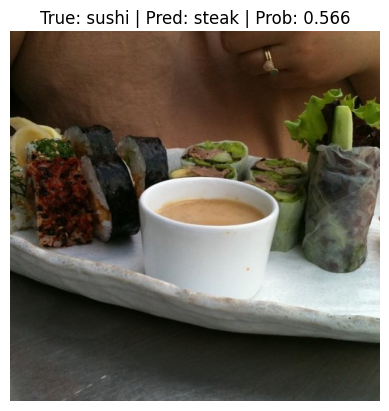

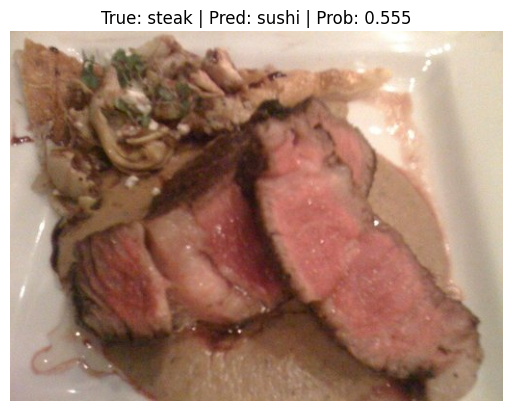

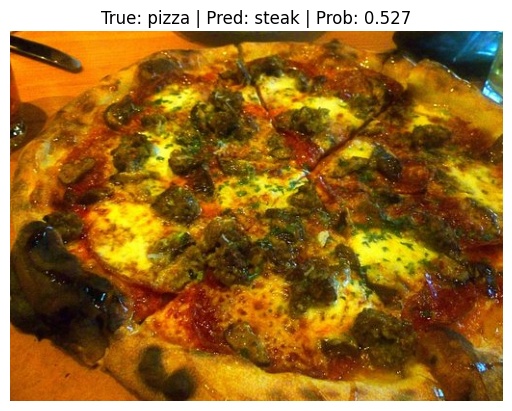

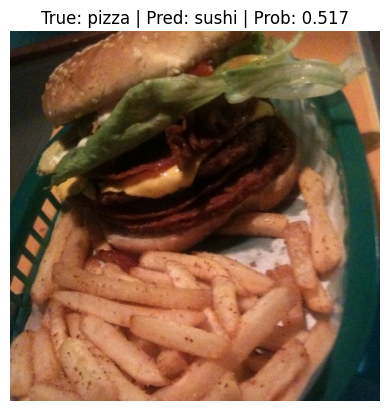

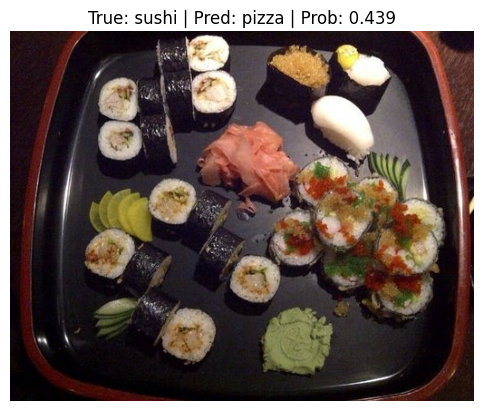

In [52]:
for row in test_pred_pd.iterrows():
  row = row[1]
  image_path = row[0]
  true_label = row[1]
  pred_prob = row[2]
  pred_class = row[3]
  # Plot the image and various details
  img = torchvision.io.read_image(str(image_path)) # get image as tensor
  plt.figure()
  plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in [height, width, color_channels]
  plt.title(f"True: {true_label} | Pred: {pred_class} | Prob: {pred_prob:.3f}")
  plt.axis(False);

## 3. Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?
* Here you can get an image from a website like http://www.unsplash.com to try it out or you can upload your own.

In [59]:
# TODO: Get an image of pizza/steak/sushi

with open("pizza.jpg", "wb") as f:
    request = requests.get(url = "https://images.unsplash.com/photo-1588315029754-2dd089d39a1a")
    f.write(request.content)


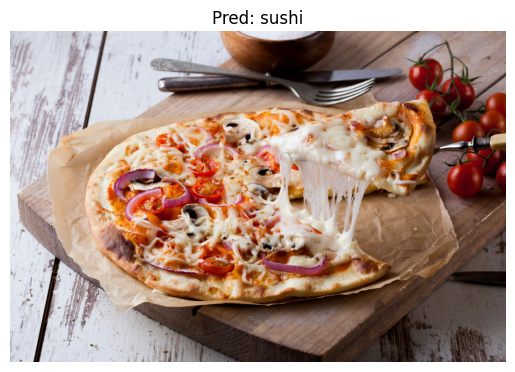

In [62]:
# TODO: Get an image of not pizza/steak/sushi
def pred_and_plot(image_path, model, transform, class_names, device=device):
    img = Image.open(image_path)
    transform_img = transform(img)
    model.eval()
    with torch.inference_mode():
        pred_logit = model(transform_img.to(device).unsqueeze(dim=0))
        pred_label = torch.argmax(torch.softmax(pred_logit, dim=1), dim=1)
    plt.figure() 
    plt.imshow(img)
    plt.title(f"Pred: {class_names[pred_label]}")
    plt.axis(False);

pred_and_plot(image_path = "pizza.jpg",
              model=model_0,
              transform=simple_transform,
              class_names=class_names)
    

In [63]:
with open("apple.jpg", "wb") as f:
    request = requests.get(url = "https://images.unsplash.com/photo-1570913149827-d2ac84ab3f9a")
    f.write(request.content)

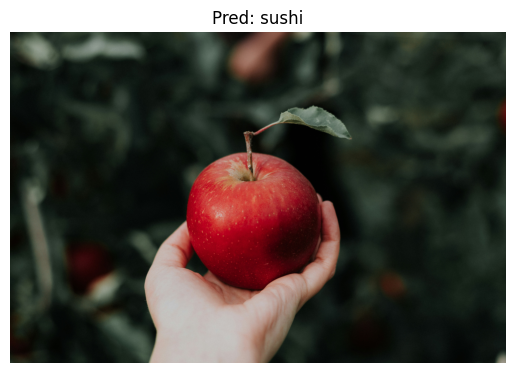

In [64]:
pred_and_plot(image_path = "apple.jpg",
              model=model_0,
              transform=simple_transform,
              class_names=class_names)

## 4. Train the model from section 4  in notebook 06 part 3 for longer (10 epochs should do), what happens to the performance?

* See the model in notebook 06 part 3 for reference: https://www.learnpytorch.io/06_pytorch_transfer_learning/#3-getting-a-pretrained-model

In [65]:
# TODO: Recreate a new model 
model_1 = torchvision.models.efficientnet_b0(pretrained=True).to(device)

for param in model_1.parameters():
    param.requires_grad = False

model_1.classifier = torch.nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(class_names), bias=True)
).to(device)

d:\pytorch exercise\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\pytorch exercise\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [66]:
# TODO: Train the model for 10 epochs
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
model_1_results = engine.train(model=model_1,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

 10%|█         | 1/10 [00:32<04:48, 32.03s/it]

Epoch: 1 | train_loss: 1.0261 | train_acc: 0.5117 | test_loss: 0.9301 | test_acc: 0.5994


 20%|██        | 2/10 [00:52<03:21, 25.19s/it]

Epoch: 2 | train_loss: 0.8558 | train_acc: 0.7148 | test_loss: 0.7805 | test_acc: 0.7945


 30%|███       | 3/10 [01:14<02:45, 23.71s/it]

Epoch: 3 | train_loss: 0.8244 | train_acc: 0.6680 | test_loss: 0.6941 | test_acc: 0.7945


 40%|████      | 4/10 [01:35<02:16, 22.74s/it]

Epoch: 4 | train_loss: 0.6761 | train_acc: 0.8594 | test_loss: 0.6502 | test_acc: 0.8977


 50%|█████     | 5/10 [01:58<01:54, 22.85s/it]

Epoch: 5 | train_loss: 0.6406 | train_acc: 0.8047 | test_loss: 0.6142 | test_acc: 0.8873


 60%|██████    | 6/10 [02:20<01:30, 22.51s/it]

Epoch: 6 | train_loss: 0.5423 | train_acc: 0.9102 | test_loss: 0.5216 | test_acc: 0.8864


 70%|███████   | 7/10 [02:40<01:05, 21.74s/it]

Epoch: 7 | train_loss: 0.5568 | train_acc: 0.7773 | test_loss: 0.5435 | test_acc: 0.8873


 80%|████████  | 8/10 [02:59<00:41, 20.82s/it]

Epoch: 8 | train_loss: 0.4900 | train_acc: 0.9102 | test_loss: 0.4658 | test_acc: 0.9072


 90%|█████████ | 9/10 [03:18<00:20, 20.29s/it]

Epoch: 9 | train_loss: 0.4689 | train_acc: 0.9258 | test_loss: 0.4888 | test_acc: 0.8977


100%|██████████| 10/10 [03:37<00:00, 21.77s/it]

Epoch: 10 | train_loss: 0.5150 | train_acc: 0.8086 | test_loss: 0.5256 | test_acc: 0.8769


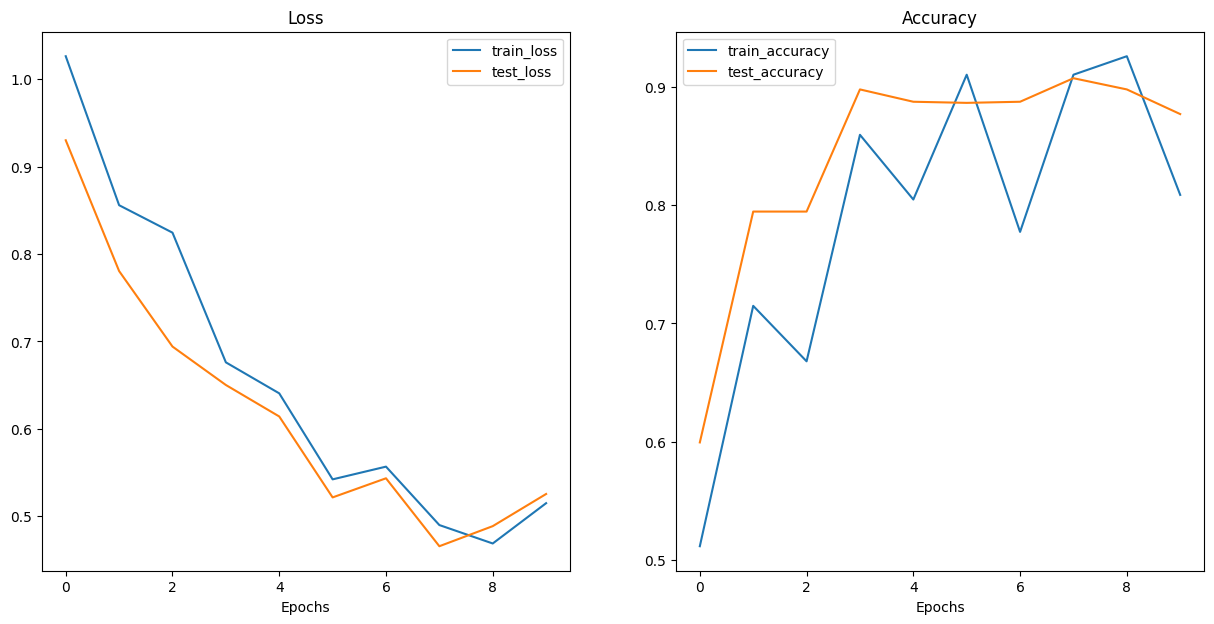

In [68]:
plot_loss_curves(model_1_results)

## 5. Train the model from section 4 above with more data, say 20% of the images from Food101 of Pizza, Steak and Sushi images.
* You can find the [20% Pizza, Steak, Sushi dataset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) on the course GitHub. It was created with the notebook [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb). 


### Get 20% data

In [67]:
import os
import requests
import zipfile

from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"
image_data_zip_path = "pizza_steak_sushi_20_percent.zip"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / image_data_zip_path, "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / image_data_zip_path, "r") as zip_ref:
        print("Unzipping pizza, steak, sushi 20% data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / image_data_zip_path)

# Setup Dirs
train_dir_20_percent = image_path / "train"
test_dir_20_percent = image_path / "test"

train_dir_20_percent, test_dir_20_percent

data\pizza_steak_sushi_20_percent directory exists.


(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

### Create DataLoaders

In [69]:
# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [70]:
# Create training and testing DataLoader's as well as get a list of class names
train_dataloader_20_percent, test_dataloader_20_percent, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_percent,
                                                                                                     test_dir=test_dir_20_percent,
                                                                                                     transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                                                     batch_size=32) # set mini-batch size to 32

train_dataloader_20_percent, test_dataloader_20_percent, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1d7a7206e50>,
 ['pizza', 'steak', 'sushi'])

### Get a pretrained model

In [71]:
# TODO
model_2 = torchvision.models.efficientnet_b0(pretrained=True).to(device)

for param in model_2.features.parameters():
  param.requires_grad = False

torch.manual_seed(42)
model_2.classifier = nn.Sequential(
  nn.Dropout(p=0.2, inplace=True),
  nn.Linear(in_features=1280, out_features=3, bias=True)
).to(device) 

### Train a model with 20% of the data

In [72]:
# TODO
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
model_2_results = engine.train(model=model_2,
                              train_dataloader=train_dataloader_20_percent,
                              test_dataloader=test_dataloader_20_percent,
                              optimizer=optimizer,
                              loss_fn=loss_fn,
                              epochs=5,
                              device=device)

 20%|██        | 1/5 [00:21<01:26, 21.50s/it]

Epoch: 1 | train_loss: 0.9637 | train_acc: 0.6229 | test_loss: 0.6433 | test_acc: 0.8665


 40%|████      | 2/5 [00:41<01:01, 20.45s/it]

Epoch: 2 | train_loss: 0.6937 | train_acc: 0.8187 | test_loss: 0.5274 | test_acc: 0.8545


 60%|██████    | 3/5 [01:00<00:40, 20.04s/it]

Epoch: 3 | train_loss: 0.5804 | train_acc: 0.8604 | test_loss: 0.4591 | test_acc: 0.8790


 80%|████████  | 4/5 [01:20<00:19, 19.99s/it]

Epoch: 4 | train_loss: 0.5044 | train_acc: 0.8625 | test_loss: 0.4167 | test_acc: 0.8761


100%|██████████| 5/5 [01:40<00:00, 20.05s/it]

Epoch: 5 | train_loss: 0.4972 | train_acc: 0.8562 | test_loss: 0.3826 | test_acc: 0.8977


## 6. Try a different model from [`torchvision.models`](https://pytorch.org/vision/stable/models.html) on the Pizza, Steak, Sushi data, how does this model perform?
* You'll have to change the size of the classifier layer to suit our problem.
* You may want to try an EfficientNet with a higher number than our B0, perhaps `torchvision.models.efficientnet_b2()`?
  * **Note:** Depending on the model you use you will have to prepare/transform the data in a certain way.

In [80]:
# TODO 

weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

effnet_b2_transform = weights.transforms()


train_dataloader_effnet_b2, test_dataloader_effnet_b2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                   test_dir=test_dir,
                                                                                                   transform=effnet_b2_transform,
                                                                                                   batch_size=32)

In [81]:
model_3 = torchvision.models.efficientnet_b2(pretrained=True).to(device)

for param in model_3.parameters():
  param.requires_grad = False

torch.manual_seed(42)
model_3.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(in_features=1408, out_features=len(class_names), bias=True)
).to(device)

In [82]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3_results = engine.train(model=model_3,
                              train_dataloader=train_dataloader_effnet_b2,
                              test_dataloader=test_dataloader_effnet_b2,
                              optimizer=optimizer,
                              loss_fn=loss_fn,
                              epochs=5,
                              device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:28<01:53, 28.39s/it]

Epoch: 1 | train_loss: 1.0953 | train_acc: 0.3594 | test_loss: 0.9121 | test_acc: 0.7642


 40%|████      | 2/5 [00:49<01:13, 24.34s/it]

Epoch: 2 | train_loss: 0.8831 | train_acc: 0.6914 | test_loss: 0.8460 | test_acc: 0.8049


 60%|██████    | 3/5 [01:11<00:45, 22.87s/it]

Epoch: 3 | train_loss: 0.7760 | train_acc: 0.8438 | test_loss: 0.7701 | test_acc: 0.8258


 80%|████████  | 4/5 [01:32<00:22, 22.43s/it]

Epoch: 4 | train_loss: 0.7289 | train_acc: 0.7500 | test_loss: 0.6613 | test_acc: 0.8561


100%|██████████| 5/5 [01:51<00:00, 22.27s/it]

Epoch: 5 | train_loss: 0.6359 | train_acc: 0.8125 | test_loss: 0.6477 | test_acc: 0.8466


In [83]:
max(model_0_results["test_acc"]), min(model_0_results["test_loss"])

(0.8863636363636364, 0.6277358531951904)

In [84]:
max(model_1_results["test_acc"]), min(model_1_results["test_loss"])

(0.9071969696969697, 0.4658170243104299)